In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/diabetes.csv')

In [7]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


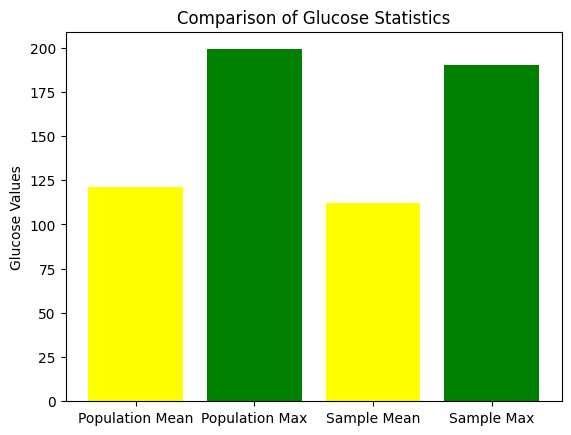

In [13]:
# Set the random seed to ensure reproducibility
np.random.seed(930)

# Take a random sample of 25 observations from the DataFrame df
sample = df.sample(25)

# Calculate statistics for glucose in the population and the sample
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Create a bar chart to visually compare glucose statistics
labels = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]
plt.bar(labels, values, color=['yellow', 'green', 'yellow', 'green'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()


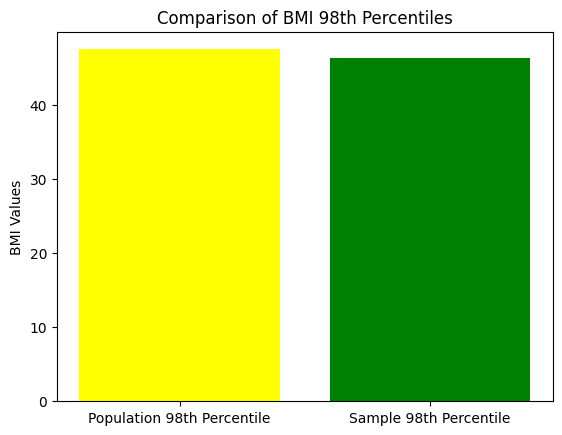

In [14]:
population_percent = np.percentile(df['BMI'], 98)
sample_percent = np.percentile(sample['BMI'], 98)

name_label = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_percent, sample_percent]
plt.bar(name_label, values, color=['yellow', 'green'])
plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI Values')
plt.show()

In [16]:
bootstrap_samples = 500
sample_size = 150

bootstrap_means = np.zeros(bootstrap_samples)
bootstrap_std_devs = np.zeros(bootstrap_samples)
bootstrap_percentiles = np.zeros(bootstrap_samples)

for i in range(bootstrap_samples):
    bootstrap_sample = df['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_std_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 98)

population_mean = df['BloodPressure'].mean()
population_std_dev = df['BloodPressure'].std()
population_percentile = np.percentile(df['BloodPressure'], 98)

bmean=np.mean(bootstrap_means)
bsd=np.mean(bootstrap_std_devs)
bp=np.mean(bootstrap_percentiles)

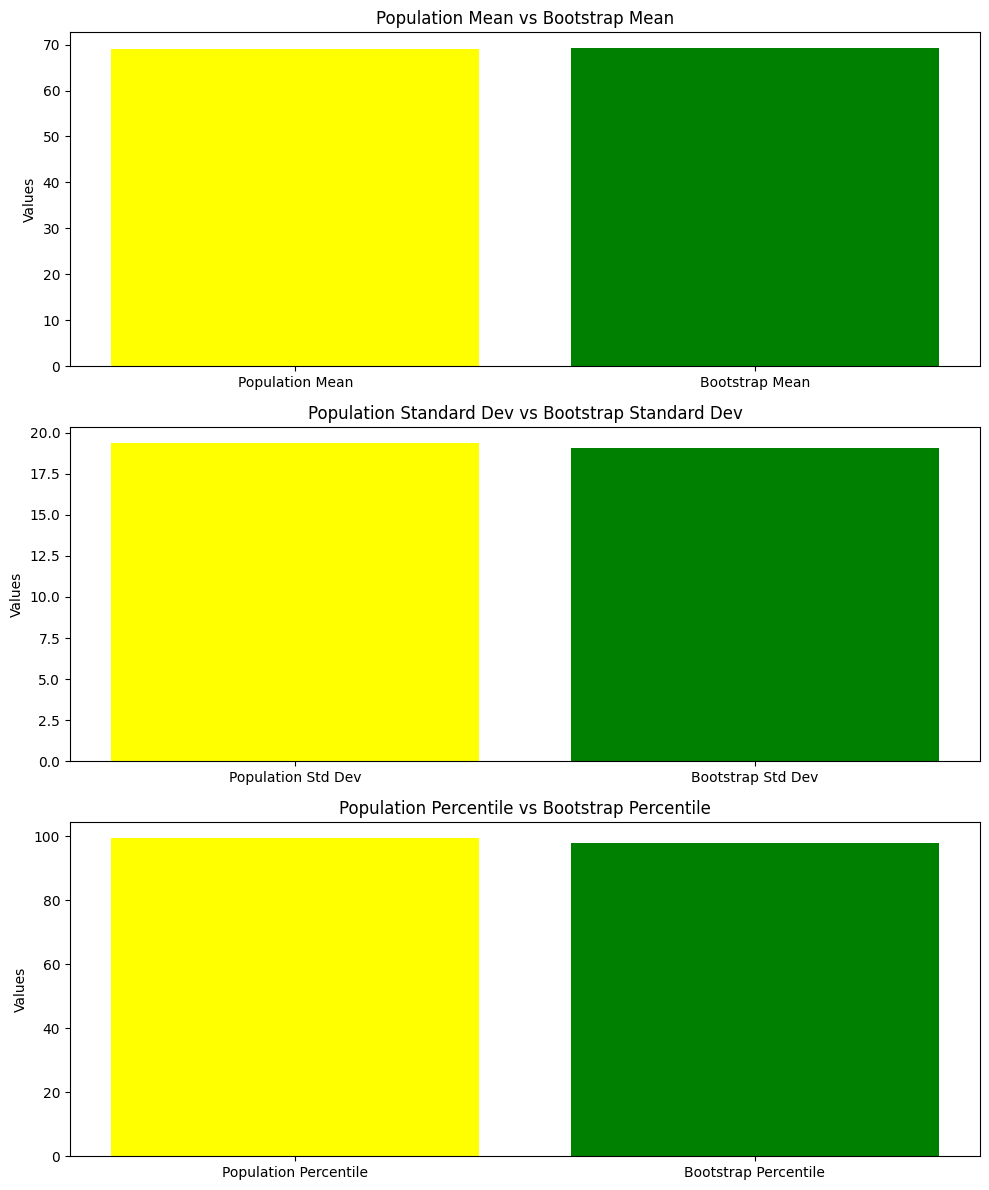

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, bmean], color=['yellow', 'green'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')


axs[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [population_std_dev, bsd], color=['yellow', 'green'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Standard Dev vs Bootstrap Standard Dev')


axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [population_percentile, bp], color=['yellow', 'green'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()